In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [6]:
UREF = 2.5

## Qaulitative plots
Mag, and components

In [80]:
# img = np.load(Path()/"spacio_training_2/validation_images/49088-04092023.npy") # New data set
# img = np.load(Path()/"spacio_training_2/validation_images/49197-05092023.npy") # New data set with additional features
# img = np.load(Path()/"spacio_training_2/validation_images/49626-13092023.npy") # New data set MAE
# img = np.load(Path()/"spacio_training_2/validation_images/49719-15092023.npy") # New data set MSE
# img = np.load(Path()/"spacio_training_2/validation_images/49994-19092023.npy") # New data set zero mask MAE
# img = np.load(Path()/"spacio_training_2/validation_images/50100-21092023.npy") # New data set [-1,1] MAE
img = np.load(Path()/"spacio_training_2/validation_images/50287-25092023.npy") # New data set [-1,1] MAE
# img = np.load(Path()/"spacio_training_2/validation_images/50350-25092023.npy") # New data set [-1,1] MAE
# img = np.load(Path()/"spacio_training_2/validation_images/50411-26092023.npy") # New data set [-1,1] MAE
# img = np.load(Path()/"spacio_training_2/validation_images/51322-10102023.npy") # New data set [-1,1] MAE
# img = np.load(Path()/"spacio_training_2/validation_images/51363-11102023.npy") # 20 epochs up to sin(4x)
img = np.load(Path()/"spacio_training_2/validation_images/51878-17102023.npy") # 20 epochs up to sin(4x)

geo = np.load(Path()/"spacio_training_2/processed/162_0_geom.npy")
mask = np.all(geo >= [0.003921569,0.003921569,0.003921569], axis=-1)
truth = np.load(Path()/"spacio_training_2/processed_actual_V/162_U_0_2.npy")
corner_mask = np.load(Path()/"spacio_training_2/corner_mask.npy")
# truth = truth.clip(0,1)
truth[mask] = [0,0,0]
img[mask] = [0,0,0]
truth[corner_mask] = [0,0,0]
img[corner_mask] = [0,0,0]


In [8]:
tux = (truth[:,:,0])
tuy = (truth[:,:,1])
tuz = (truth[:,:,2])
tmag = np.sqrt(tux**2 + tuy**2 + tuz**2)

pux = (img[:,:,0])
puy = (img[:,:,1])
puz = (img[:,:,2])
pmag = np.sqrt(pux**2 + puy**2 + puz**2)

# tmag = tmag/2.5
# pmag = pmag/2.5

Text(0, 0.5, 'm/s')

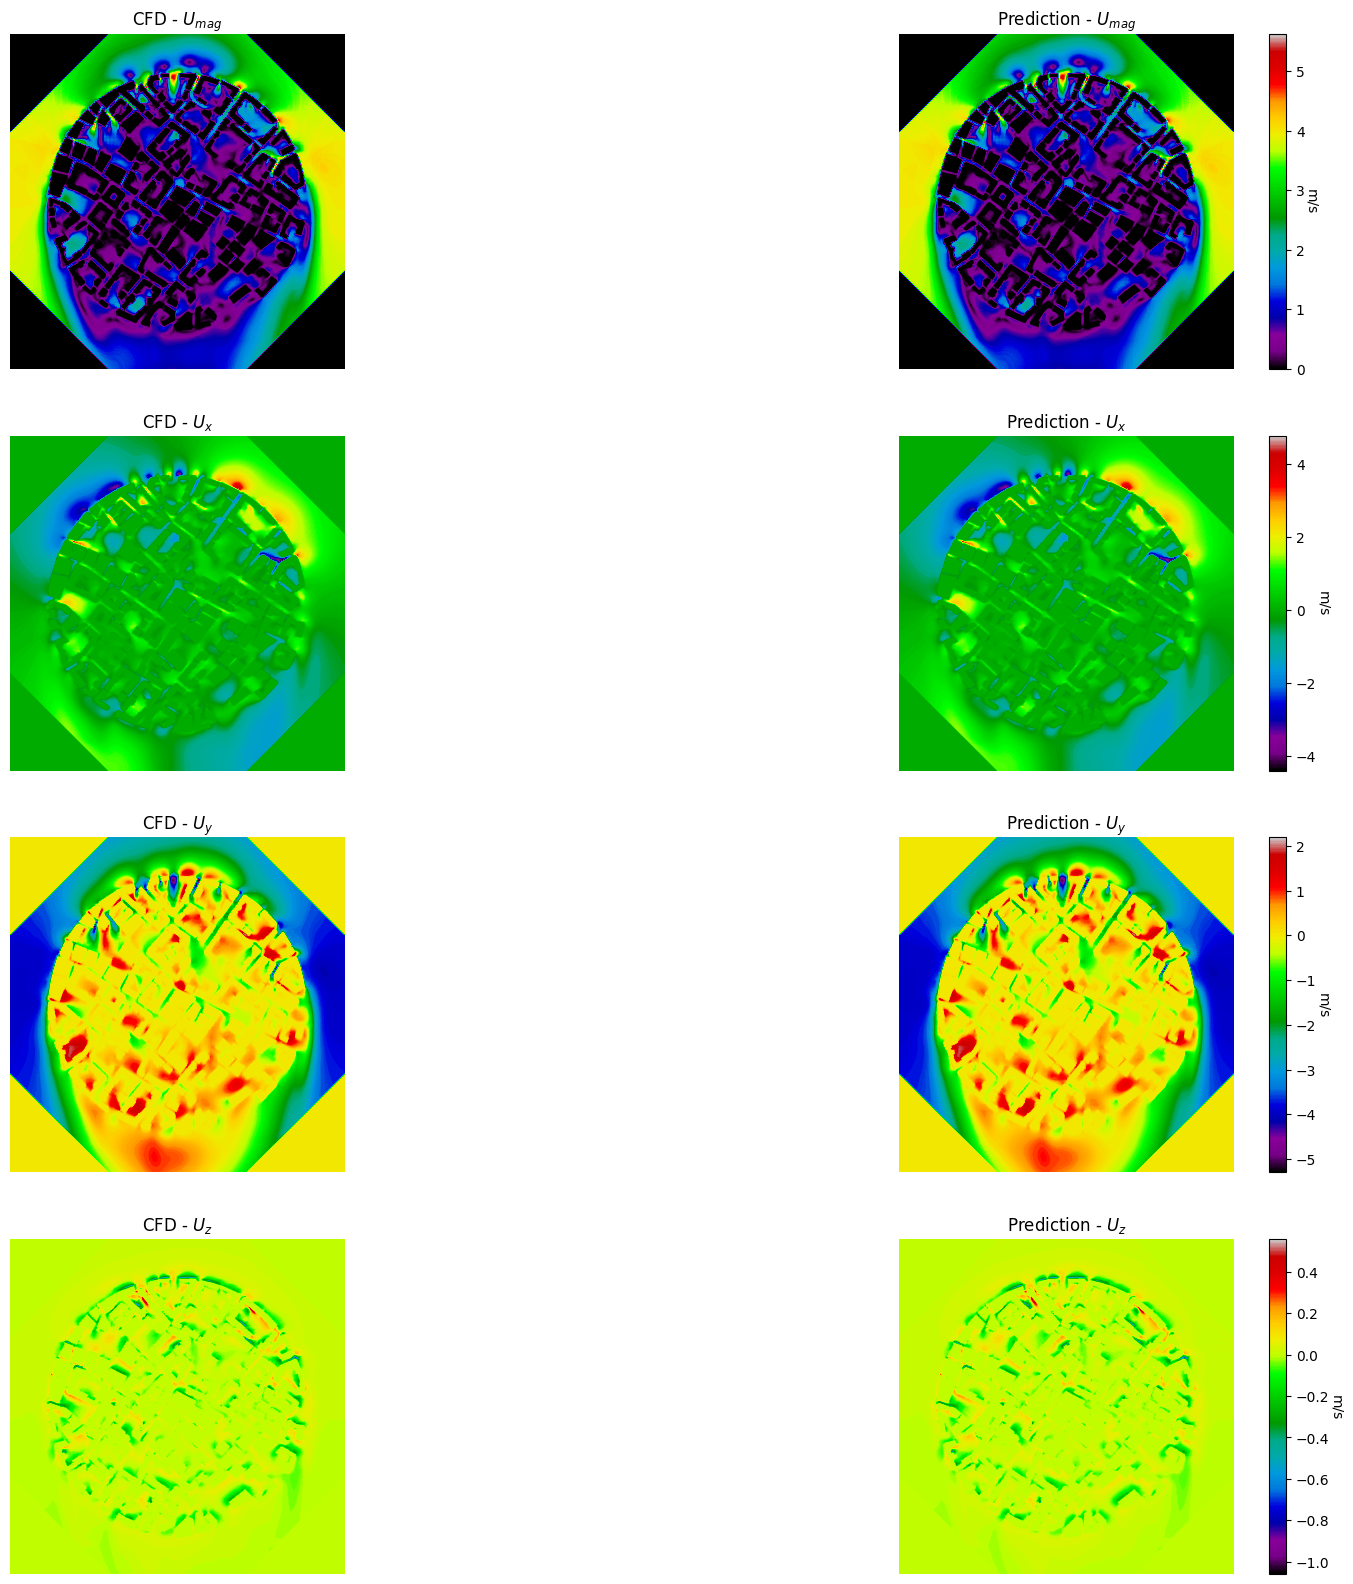

In [9]:
plt.rcParams['figure.figsize'] = [20, 20]

fig, ax = plt.subplots(4, 2)
# plt.tight_layout()
# fig.subplots_adjust(wspace=0, left=0, right=1)

im = ax[0,0].imshow(tmag, cmap='nipy_spectral')
ax[0,0].axis('off')
ax[0,0].title.set_text("CFD - $U_{mag}$")

ax[0,1].imshow(pmag, cmap='nipy_spectral', vmin=0, vmax=tmag.max())
ax[0,1].axis('off')
ax[0,1].title.set_text("Prediction - $U_{mag}$")
plt.colorbar(im, ax=ax[0, 1]).ax.set_ylabel('m/s', rotation=270, labelpad=10)


im = ax[1,0].imshow(tux, cmap='nipy_spectral')
ax[1,0].axis('off')
ax[1,0].title.set_text("CFD - $U_{x}$")

ax[1,1].imshow(pux, cmap='nipy_spectral', vmin=tux.min(), vmax=tux.max())
ax[1,1].axis('off')
ax[1,1].title.set_text("Prediction - $U_{x}$")
plt.colorbar(im, ax=ax[1, 1]).ax.set_ylabel('m/s', rotation=270, labelpad=10)

im = ax[2,0].imshow(tuy, cmap='nipy_spectral')
ax[2,0].axis('off')
ax[2,0].title.set_text("CFD - $U_{y}$")

ax[2,1].imshow(puy, cmap='nipy_spectral', vmin=tuy.min(), vmax=tuy.max())
ax[2,1].axis('off')
ax[2,1].title.set_text("Prediction - $U_{y}$")
plt.colorbar(im, ax=ax[2, 1]).ax.set_ylabel('m/s', rotation=270, labelpad=10)

im = ax[3,0].imshow(tuz, cmap='nipy_spectral')
ax[3,0].axis('off')
ax[3,0].title.set_text("CFD - $U_{z}$")

ax[3,1].imshow(puz, cmap='nipy_spectral', vmin=tuz.min(), vmax=tuz.max())
ax[3,1].axis('off')
ax[3,1].title.set_text("Prediction - $U_{z}$")
plt.colorbar(im, ax=ax[3, 1]).ax.set_ylabel('m/s', rotation=270, labelpad=10)


## Absolute error plots

In [3]:
# img = np.load(Path()/"spacio_training_2/validation_images/49088-04092023.npy") # New data set
# img = np.load(Path()/"spacio_training_2/validation_images/49197-05092023.npy") # New data set with additional features
# img = np.load(Path()/"spacio_training_2/validation_images/49626-13092023.npy") # New data set MAE
# img = np.load(Path()/"spacio_training_2/validation_images/49719-15092023.npy") # New data set MSE
# img = np.load(Path()/"spacio_training_2/validation_images/49994-19092023.npy") # New data set zero mask MAE
# img = np.load(Path()/"spacio_training_2/validation_images/50100-21092023.npy") # New data set [-1,1] MAE
img = np.load(Path()/"spacio_training_2/validation_images/50287-25092023.npy") # New data set [-1,1] MAE
# img = np.load(Path()/"spacio_training_2/validation_images/50350-25092023.npy") # New data set [-1,1] MAE
# img = np.load(Path()/"spacio_training_2/validation_images/50411-26092023.npy") # New data set [-1,1] MAE
# img = np.load(Path()/"spacio_training_2/validation_images/51322-10102023.npy") # New data set [-1,1] MAE
# img = np.load(Path()/"spacio_training_2/validation_images/51363-11102023.npy") # 20 epochs up to sin(4x)
img = np.load(Path()/"spacio_training_2/validation_images/51878-17102023.npy") # 20 epochs up to sin(4x)
img = np.load(Path()/"analysis/Models and Images/temp.npy") # 20 epochs up to sin(4x)
img = np.load(Path()/"spacio_training_2/validation_images/new_model.npy") # 20 epochs up to sin(4x)

geo = np.load(Path()/"spacio_training_2/processed/162_0_geom.npy")
mask = np.all(geo >= [0.003921569,0.003921569,0.003921569], axis=-1)
truth = np.load(Path()/"spacio_training_2/processed_actual_V/162_U_0_2.npy")
corner_mask = np.load(Path()/"spacio_training_2/corner_mask.npy")
# truth = truth.clip(0,1)
truth[mask] = [0,0,0]
img[mask] = [0,0,0]
truth[corner_mask] = [0,0,0]
img[corner_mask] = [0,0,0]

In [4]:
diff = truth - img
ux = abs(diff[:,:,0])
uy = abs(diff[:,:,1])
uz = abs(diff[:,:,2])
mag = np.sqrt(ux**2 + uy**2 + uz**2)


Text(0, 0.5, '$U_{z}$/$U_{ref}$')

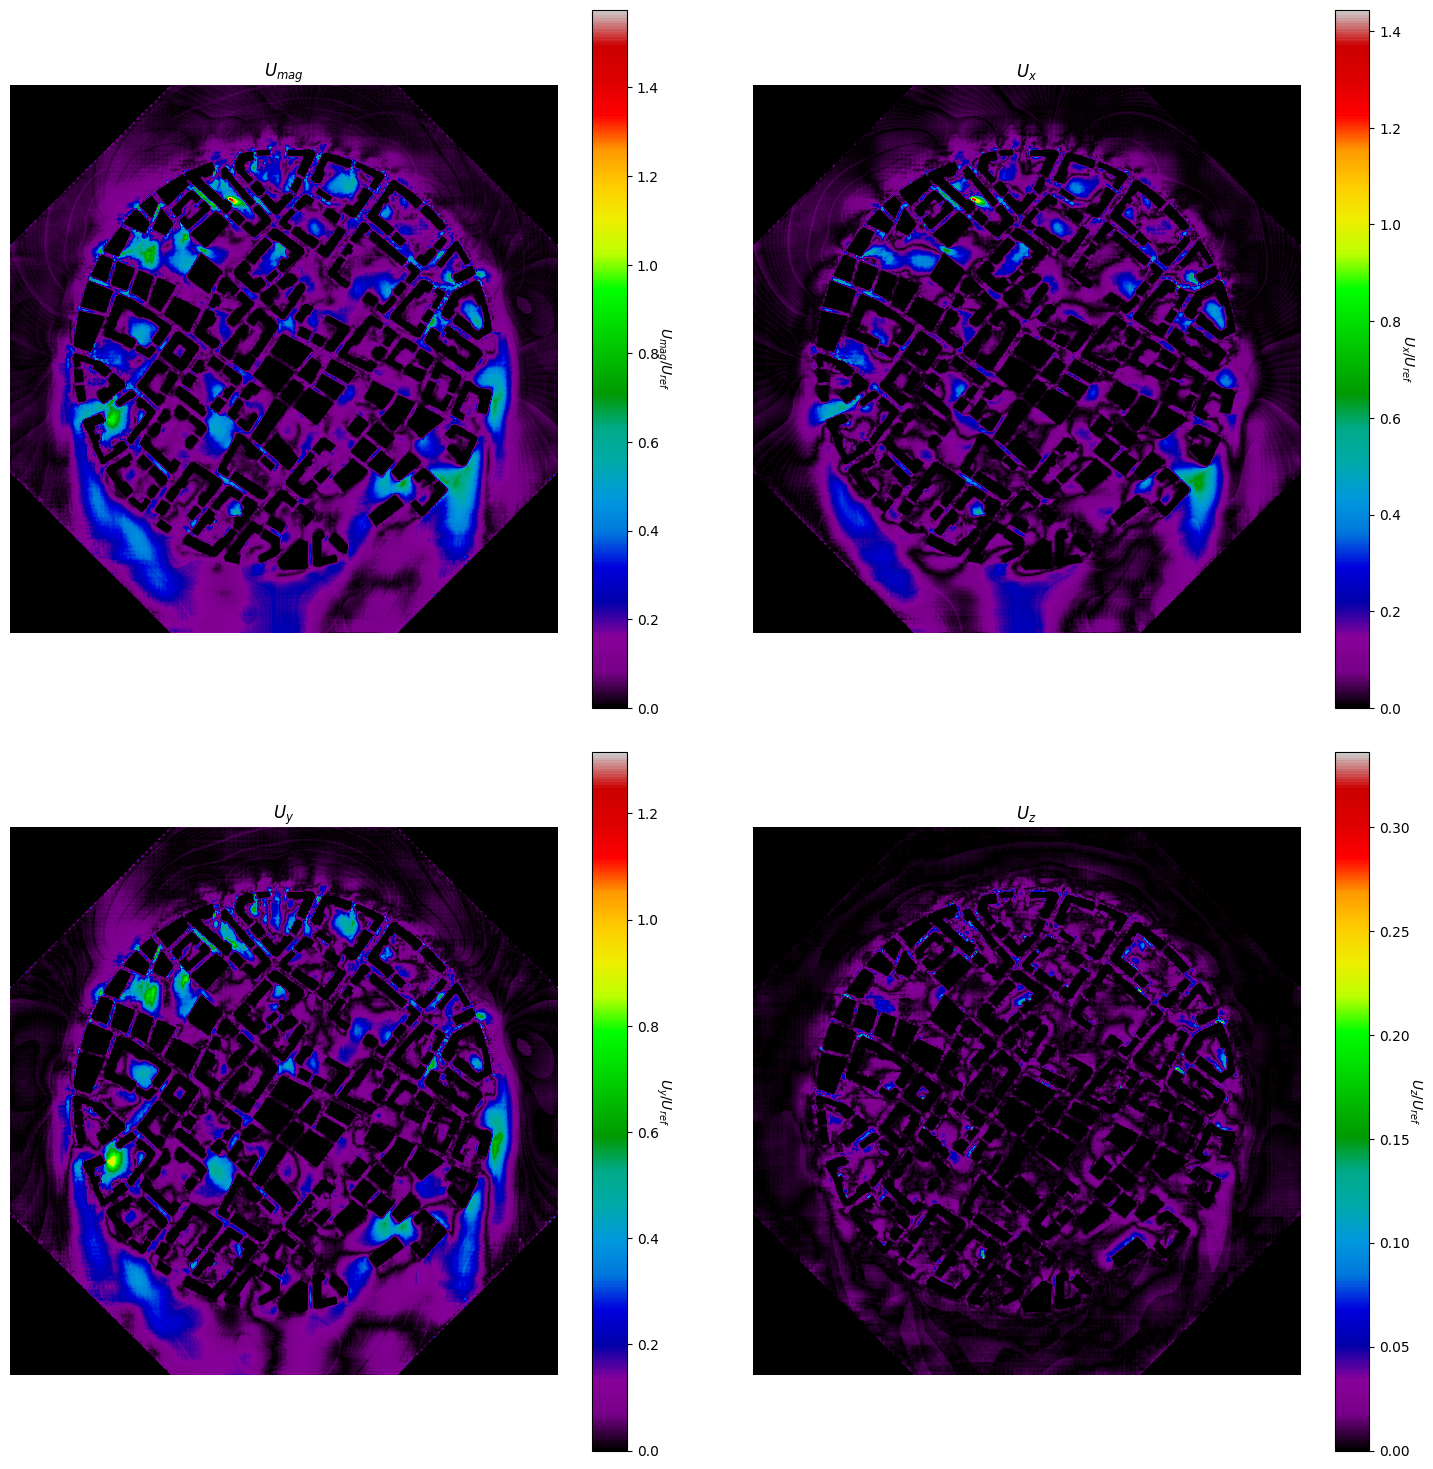

In [5]:
plt.rcParams['figure.figsize'] = [15, 15]

fig, ax = plt.subplots(2, 2)
plt.tight_layout()
# fig.subplots_adjust(wspace=0, left=0, right=1)

im = ax[0,0].imshow(mag/UREF, cmap='nipy_spectral')
ax[0,0].axis('off')
ax[0,0].title.set_text("$U_{mag}$")
plt.colorbar(im, ax=ax[0, 0]).ax.set_ylabel('$U_{mag}$/$U_{ref}$', rotation=270, labelpad=10)

im = ax[0,1].imshow(ux/UREF, cmap='nipy_spectral')
ax[0,1].axis('off')
ax[0,1].title.set_text("$U_{x}$")
plt.colorbar(im, ax=ax[0, 1]).ax.set_ylabel('$U_{x}$/$U_{ref}$', rotation=270, labelpad=10)

im = ax[1,0].imshow(uy/UREF, cmap='nipy_spectral')
ax[1,0].axis('off')
ax[1,0].title.set_text("$U_{y}$")
plt.colorbar(im, ax=ax[1,0]).ax.set_ylabel('$U_{y}$/$U_{ref}$', rotation=270, labelpad=10)

im = ax[1,1].imshow(uz/UREF, cmap='nipy_spectral')
ax[1,1].axis('off')
ax[1,1].title.set_text("$U_{z}$")
plt.colorbar(im, ax=ax[1,1]).ax.set_ylabel('$U_{z}$/$U_{ref}$', rotation=270, labelpad=10)

In [6]:
diff = truth - img
ux = abs(diff[:,:,0])
uy = abs(diff[:,:,1])
uz = abs(diff[:,:,2])
mag = np.sqrt(ux**2 + uy**2 + uz**2)

mag = mag[300:700,300:700]
ux = ux[300:700,300:700]
uy = uy[300:700,300:700]
uz = uz[300:700,300:700]

Text(0, 0.5, '$U_{z}$/$U_{ref}$')

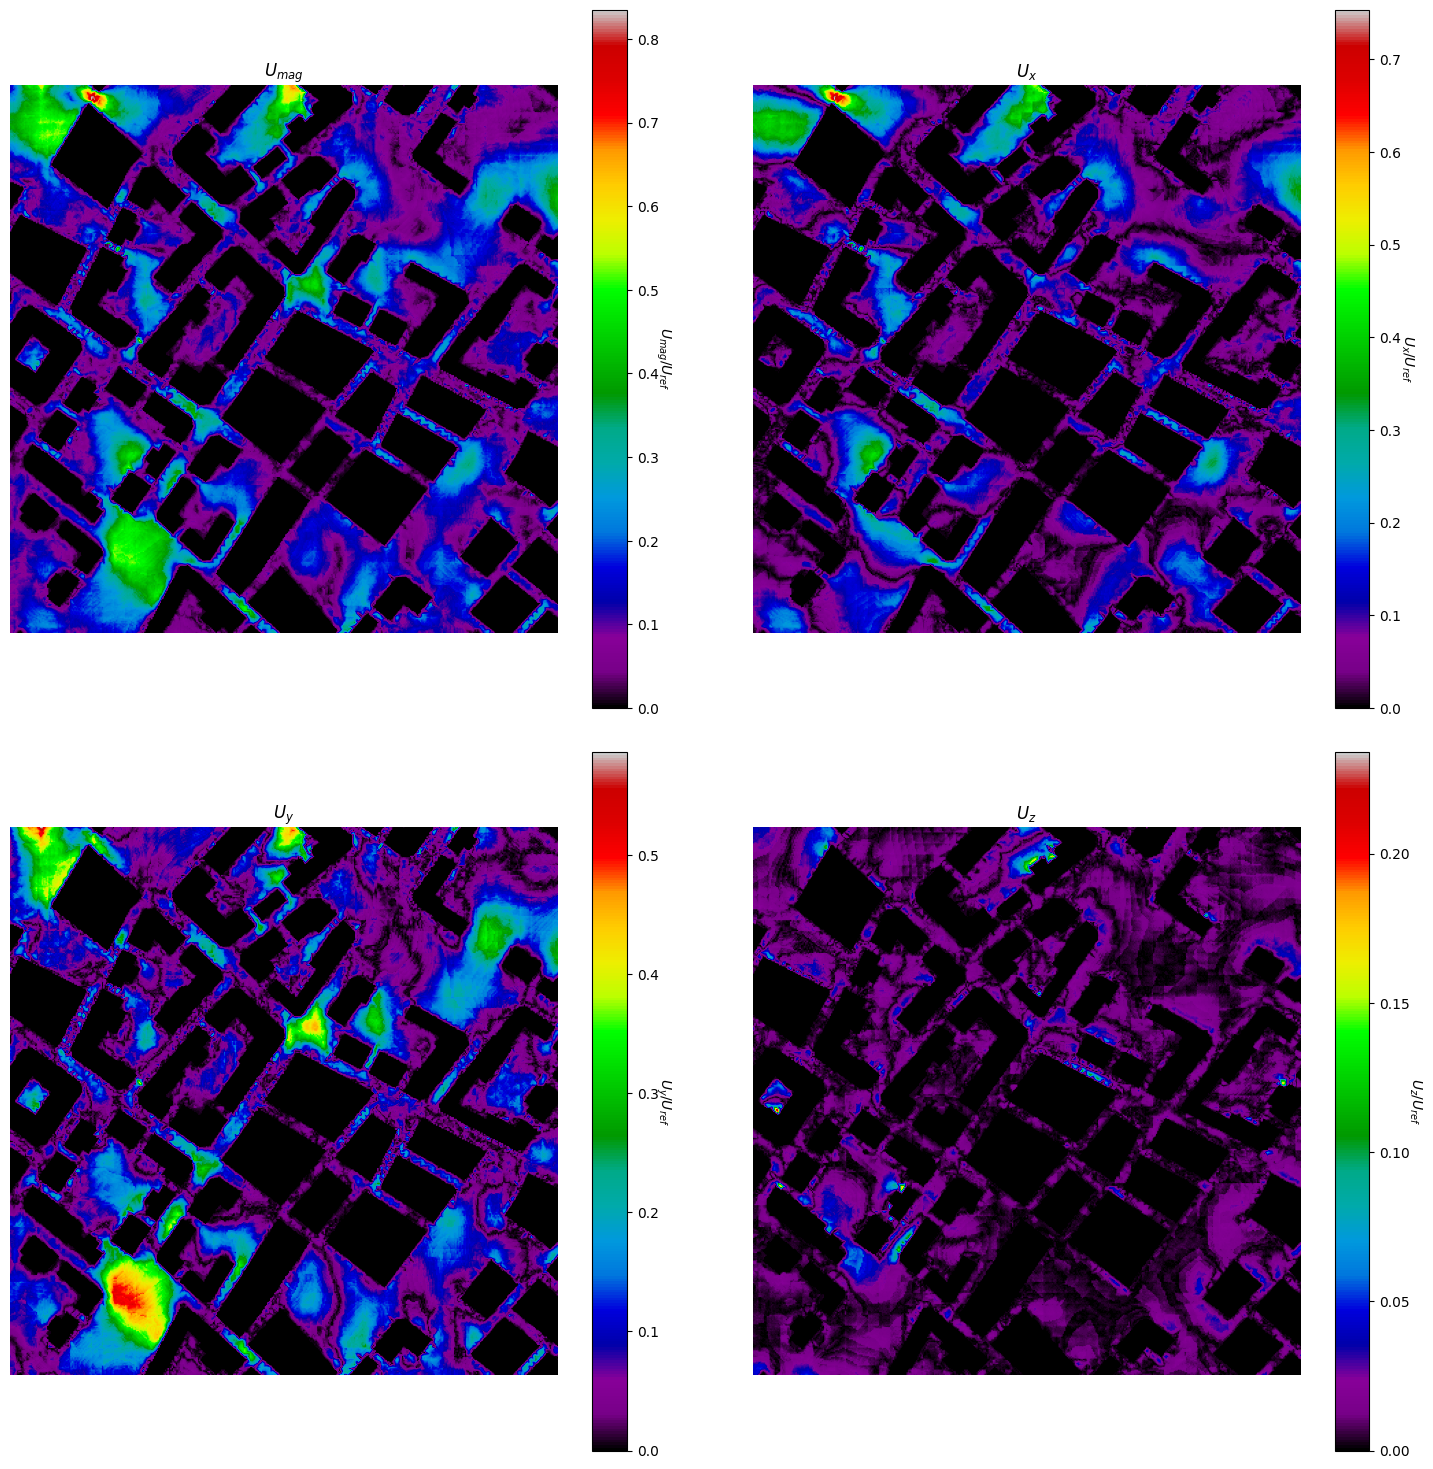

In [7]:
plt.rcParams['figure.figsize'] = [15, 15]

fig, ax = plt.subplots(2, 2)
plt.tight_layout()
# fig.subplots_adjust(wspace=0, left=0, right=1)

im = ax[0,0].imshow(mag/UREF, cmap='nipy_spectral')
ax[0,0].axis('off')
ax[0,0].title.set_text("$U_{mag}$")
plt.colorbar(im, ax=ax[0, 0]).ax.set_ylabel('$U_{mag}$/$U_{ref}$', rotation=270, labelpad=10)

im = ax[0,1].imshow(ux/UREF, cmap='nipy_spectral')
ax[0,1].axis('off')
ax[0,1].title.set_text("$U_{x}$")
plt.colorbar(im, ax=ax[0, 1]).ax.set_ylabel('$U_{x}$/$U_{ref}$', rotation=270, labelpad=10)

im = ax[1,0].imshow(uy/UREF, cmap='nipy_spectral')
ax[1,0].axis('off')
ax[1,0].title.set_text("$U_{y}$")
plt.colorbar(im, ax=ax[1,0]).ax.set_ylabel('$U_{y}$/$U_{ref}$', rotation=270, labelpad=10)

im = ax[1,1].imshow(uz/UREF, cmap='nipy_spectral')
ax[1,1].axis('off')
ax[1,1].title.set_text("$U_{z}$")
plt.colorbar(im, ax=ax[1,1]).ax.set_ylabel('$U_{z}$/$U_{ref}$', rotation=270, labelpad=10)

## Error cumulative plot

In [124]:
# img = np.load(Path()/"spacio_training_2/validation_images/49088-04092023.npy") # New data set
# img = np.load(Path()/"spacio_training_2/validation_images/49197-05092023.npy") # New data set with additional features
# img = np.load(Path()/"spacio_training_2/validation_images/49626-13092023.npy") # New data set MAE
# img = np.load(Path()/"spacio_training_2/validation_images/49719-15092023.npy") # New data set MSE
# img = np.load(Path()/"spacio_training_2/validation_images/49994-19092023.npy") # New data set zero mask MAE
# img = np.load(Path()/"spacio_training_2/validation_images/50100-21092023.npy") # New data set [-1,1] MAE
img = np.load(Path()/"spacio_training_2/validation_images/50287-25092023.npy") # New data set [-1,1] MAE
# img = np.load(Path()/"spacio_training_2/validation_images/50350-25092023.npy") # New data set [-1,1] MAE
# img = np.load(Path()/"spacio_training_2/validation_images/50411-26092023.npy") # New data set [-1,1] MAE
# img = np.load(Path()/"spacio_training_2/validation_images/51322-10102023.npy") # New data set [-1,1] MAE
# img = np.load(Path()/"spacio_training_2/validation_images/51363-11102023.npy") # 20 epochs up to sin(4x)
img = np.load(Path()/"spacio_training_2/validation_images/51878-17102023.npy") # 20 epochs up to sin(4x)

geo = np.load(Path()/"spacio_training_2/processed/162_0_geom.npy")
mask = np.all(geo >= [0.003921569,0.003921569,0.003921569], axis=-1)
truth = np.load(Path()/"spacio_training_2/processed_actual_V/162_U_0_2.npy")
corner_mask = np.load(Path()/"spacio_training_2/corner_mask.npy")
# truth = truth.clip(0,1)
truth[mask] = [0,0,0]
img[mask] = [0,0,0]
truth[corner_mask] = [0,0,0]
img[corner_mask] = [0,0,0]

In [107]:
diff = truth - img
ux = (diff[:,:,0])
uy = (diff[:,:,1])
uz = (diff[:,:,2])
mag = np.sqrt(ux**2 + uy**2 + uz**2)
mag[mask] = 99
mag[corner_mask] = 99
mag_crop = mag[300:700,300:700]
mag = mag[mag<99]
mag_crop = mag_crop[mag_crop<99]

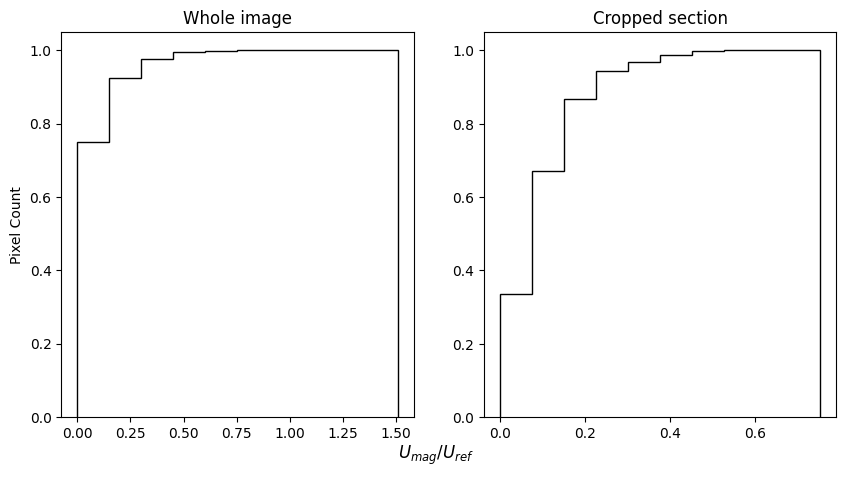

In [73]:
plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots(1, 2,)
fig.supxlabel('$U_{mag}$/$U_{ref}$')
values, bins, _ = ax[0].hist(mag/UREF, cumulative=True, density=True, color="black", histtype="step")
ax[0].set_ylabel("Pixel Count")
ax[0].title.set_text("Whole image")

ax[1].hist(mag_crop/UREF, cumulative=True, density=True, color="black", histtype="step")
ax[1].title.set_text("Cropped section")


## Stats for table

In [10]:
# img = np.load(Path()/"spacio_training_2/validation_images/49088-04092023.npy") # New data set
# img = np.load(Path()/"spacio_training_2/validation_images/49197-05092023.npy") # New data set with additional features
# img = np.load(Path()/"spacio_training_2/validation_images/49626-13092023.npy") # New data set MAE
# img = np.load(Path()/"spacio_training_2/validation_images/49719-15092023.npy") # New data set MSE
# img = np.load(Path()/"spacio_training_2/validation_images/49994-19092023.npy") # New data set zero mask MAE
# img = np.load(Path()/"spacio_training_2/validation_images/50100-21092023.npy") # New data set [-1,1] MAE
img = np.load(Path()/"spacio_training_2/validation_images/50287-25092023.npy") # New data set [-1,1] MAE
# img = np.load(Path()/"spacio_training_2/validation_images/50350-25092023.npy") # New data set [-1,1] MAE
# img = np.load(Path()/"spacio_training_2/validation_images/50411-26092023.npy") # New data set [-1,1] MAE
# img = np.load(Path()/"spacio_training_2/validation_images/51322-10102023.npy") # New data set [-1,1] MAE
# img = np.load(Path()/"spacio_training_2/validation_images/51363-11102023.npy") # 20 epochs up to sin(4x)
img = np.load(Path()/"spacio_training_2/validation_images/51878-17102023.npy") # 20 epochs up to sin(4x)
# img = np.load(Path()/"analysis/Models and Images/54133.npy") # 20 epochs up to sin(4x)

geo = np.load(Path()/"spacio_training_2/processed/162_0_geom.npy")
mask = np.all(geo >= [0.003921569,0.003921569,0.003921569], axis=-1)
truth = np.load(Path()/"spacio_training_2/processed_actual_V/162_U_0_2.npy")
corner_mask = np.load(Path()/"spacio_training_2/corner_mask.npy")
# truth = truth.clip(0,1)
truth[mask] = [0,0,0]
img[mask] = [0,0,0]
truth[corner_mask] = [0,0,0]
img[corner_mask] = [0,0,0]

In [11]:
diff = truth - img
ux = (diff[:,:,0])
uy = (diff[:,:,1])
uz = (diff[:,:,2])
mag = np.sqrt(ux**2 + uy**2 + uz**2)
mag[mask] = 99
mag[corner_mask] = 99
mag_crop = mag[300:700,300:700]
mag = mag[mag<99]
mag_crop = mag_crop[mag_crop<99]


print(
f"""90TH: {np.percentile(mag, 90):>12.2f}
MEAN: {mag.mean():>12.2f}
------------------
90TH CROPPED: {np.percentile(mag_crop, 90):.2f}
MEAN CROPPED: {mag_crop.mean():.2f}""")

90TH:         0.66
MEAN:         0.28
------------------
90TH CROPPED: 0.62
MEAN CROPPED: 0.32


## CDF plot for the actual values of the truth and prediction

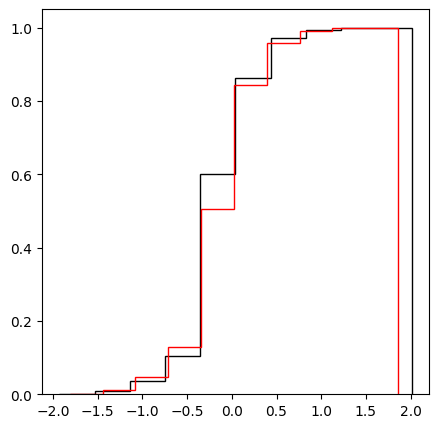

In [97]:
# For component values ux, uy, uz
plt.rcParams['figure.figsize'] = [5, 5]
img[mask] = 99
img[corner_mask] = 99
img = img[300:700,300:700]
img=img[img<99]

truth[mask] = 99
truth[corner_mask] = 99
truth = truth[300:700,300:700]
truth=truth[truth<99]


values, bins, _ = plt.hist(img, cumulative=True, density=True, color="black", histtype="step")
values, bins, _ = plt.hist(truth, cumulative=True, density=True, color="red", histtype="step")

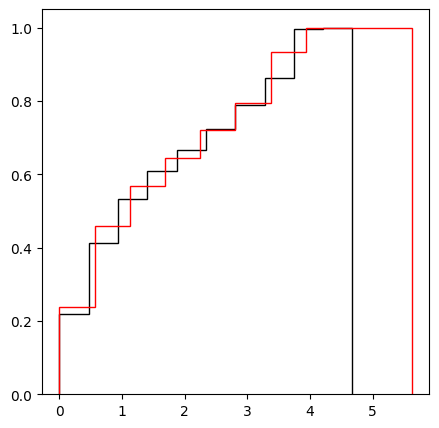

In [144]:
# For magnitudes
tux = (truth[:,:,0])
tuy = (truth[:,:,1])
tuz = (truth[:,:,2])
tmag = np.sqrt(tux**2 + tuy**2 + tuz**2)
tmag[mask] = 99
tmag[corner_mask] = 99
tmag = tmag[tmag < 99]

pux = (img[:,:,0])
puy = (img[:,:,1])
puz = (img[:,:,2])
pmag = np.sqrt(pux**2 + puy**2 + puz**2)
pmag[mask] = 99
pmag[corner_mask] = 99
pmag = pmag[pmag < 99]

values, bins, _ = plt.hist(pmag, cumulative=True, density=True, color="black", histtype="step")
values, bins, _ = plt.hist(tmag, cumulative=True, density=True, color="red", histtype="step")

## Comparison between model types
- Vanilla
- Neighbourhood
- Additional convs
- Neighbour features
- Harmonic features

In [26]:
models = ["Vanilla", "Neighbourhood mixing", "Neighbourhood mixing +", "Nearest neighbour features", "Harmonic features", "Expanded latent neighbourhood"]
model_ids = [53788, 53837, 54217, 53953, 54030, 54133]

model_dict = {k:v for k, v in zip(models, model_ids)}

# Stats

In [45]:
geo = np.load(Path()/"spacio_training_2/processed/162_0_geom.npy")
mask = np.all(geo >= [0.003921569,0.003921569,0.003921569], axis=-1)
truth = np.load(Path()/"spacio_training_2/processed_actual_V/162_U_0_2.npy")
corner_mask = np.load(Path()/"spacio_training_2/corner_mask.npy")
truth[mask] = [0,0,0]
truth[corner_mask] = [0,0,0]


for model in model_dict.keys():
    try:
        img = np.load(Path()/f"analysis/Models and Images/{model_dict[model]}.npy")
    except: continue
    img[mask] = [0,0,0]
    img[corner_mask] = [0,0,0]

    diff = truth - img
    ux, uy, uz = (diff[:,:,0]), (diff[:,:,1]), (diff[:,:,2])
    mag = np.sqrt(ux**2 + uy**2 + uz**2)
    mag[mask] = 99
    mag[corner_mask] = 99
    mag_crop = mag[300:700,300:700]
    mag = mag[mag<99]
    mag_crop = mag_crop[mag_crop<99]

    print(f"Model: {model:<29} | Mean error: {mag.mean():.2f} | 90TH error: {np.percentile(mag, 90):.2f} | Crop mean error: {mag_crop.mean():.2f} | Crop 90TH error: {np.percentile(mag_crop, 90):.2f}")
    

Model: Vanilla                       | Mean error: 0.43 | 90TH error: 0.97 | Crop mean error: 0.46 | Crop 90TH error: 0.91
Model: Neighbourhood mixing          | Mean error: 0.32 | 90TH error: 0.75 | Crop mean error: 0.35 | Crop 90TH error: 0.71
Model: Neighbourhood mixing +        | Mean error: 0.33 | 90TH error: 0.78 | Crop mean error: 0.38 | Crop 90TH error: 0.76
Model: Nearest neighbour features    | Mean error: 0.33 | 90TH error: 0.77 | Crop mean error: 0.37 | Crop 90TH error: 0.71
Model: Harmonic features             | Mean error: 0.34 | 90TH error: 0.81 | Crop mean error: 0.36 | Crop 90TH error: 0.74
Model: Expanded latent neighbourhood | Mean error: 0.32 | 90TH error: 0.75 | Crop mean error: 0.38 | Crop 90TH error: 0.81


# Stats for entire test set

In [7]:
models = [53788, 53837, 54217, 54270, 54363, 54133, 53953, 54030, 55398]
geoms = ["162_0", "162_45", "162_90", "162_135", "162_180", "162_225", "162_270", "162_315", 
         "325_0", "325_45", "325_90", "325_135", "325_180", "325_225", "325_270", "325_315",]

experiments = [f"{model}_{geom}" for model in models for geom in geoms]

In [8]:
for model in models:
    error_mean = []
    error_90th = []
    error_mean_crop = []
    error_90th_crop = []

    for geom in geoms:
        geo = np.load(Path()/f"spacio_training_2/processed/{geom}_geom.npy")
        mask = np.all(geo >= [0.003921569,0.003921569,0.003921569], axis=-1)
        corner_mask = np.load(Path()/"spacio_training_2/corner_mask.npy")


        ID, direction = geom.split("_")
        truth = np.load(Path()/f"spacio_training_2/processed_actual_V/{ID}_U_{direction}_2.npy")
        truth[mask] = [0,0,0]
        truth[corner_mask] = [0,0,0]

        img = np.load(Path()/f"analysis/inter_model_analysis/{model}_{geom}.npy")
        img[mask] = [0,0,0]
        img[corner_mask] = [0,0,0]

        diff = truth - img
        ux, uy, uz = (diff[:,:,0]), (diff[:,:,1]), (diff[:,:,2])
        mag = np.sqrt(ux**2 + uy**2 + uz**2)
        mag[mask] = 99
        mag[corner_mask] = 99
        mag_crop = mag[300:700,300:700]
        mag = mag[mag<99]
        mag_crop = mag_crop[mag_crop<99]

        error_mean.append(mag.mean())
        error_90th.append(np.percentile(mag, 90))
        error_mean_crop.append(mag_crop.mean())
        error_90th_crop.append(np.percentile(mag_crop, 90))

    error_mean = sum(error_mean)/len(error_mean)
    error_90th = sum(error_90th)/len(error_90th)
    error_mean_crop = sum(error_mean_crop)/len(error_mean_crop)
    error_90th_crop = sum(error_90th_crop)/len(error_90th_crop)

    print("_".join(["_"]*50))
    print(f"Model: {model} | Mean error: {error_mean:.2f} | 90TH error: {error_90th:.2f} | Crop mean error: {error_mean_crop:.2f} | Crop 90TH error: {error_90th_crop:.2f}")
    
print("_".join(["_"]*50))

___________________________________________________________________________________________________
Model: 53788 | Mean error: 0.70 | 90TH error: 1.50 | Crop mean error: 0.51 | Crop 90TH error: 1.05
___________________________________________________________________________________________________
Model: 53837 | Mean error: 0.33 | 90TH error: 0.76 | Crop mean error: 0.38 | Crop 90TH error: 0.76
___________________________________________________________________________________________________
Model: 54217 | Mean error: 0.32 | 90TH error: 0.73 | Crop mean error: 0.37 | Crop 90TH error: 0.74
___________________________________________________________________________________________________
Model: 54270 | Mean error: 0.33 | 90TH error: 0.75 | Crop mean error: 0.37 | Crop 90TH error: 0.73
___________________________________________________________________________________________________
Model: 54363 | Mean error: 0.31 | 90TH error: 0.71 | Crop mean error: 0.37 | Crop 90TH error: 0.74
_____

# Below here is scratch

In [46]:
geo = np.load(Path()/"spacio_training_2/processed/162_0_geom.npy")
mask = np.all(geo >= [0.003921569,0.003921569,0.003921569], axis=-1)
truth = np.load(Path()/"spacio_training_2/processed_actual_V/162_U_0_2.npy")
corner_mask = np.load(Path()/"spacio_training_2/corner_mask.npy")
truth[mask] = [0,0,0]
truth[corner_mask] = [0,0,0]

img = np.load(Path()/f"analysis/Models and Images/Temp/54270.npy")
img[mask] = [0,0,0]
img[corner_mask] = [0,0,0]

diff = truth - img
ux, uy, uz = (diff[:,:,0]), (diff[:,:,1]), (diff[:,:,2])
mag = np.sqrt(ux**2 + uy**2 + uz**2)
mag[mask] = 99
mag[corner_mask] = 99
mag_crop = mag[300:700,300:700]
mag = mag[mag<99]
mag_crop = mag_crop[mag_crop<99]

print(f"Model: {model:<29} | Mean error: {mag.mean():.2f} | 90TH error: {np.percentile(mag, 90):.2f} | Crop mean error: {mag_crop.mean():.2f} | Crop 90TH error: {np.percentile(mag_crop, 90):.2f}")
    

Model: Expanded latent neighbourhood | Mean error: 0.32 | 90TH error: 0.75 | Crop mean error: 0.33 | Crop 90TH error: 0.66


In [14]:
truth = np.load(Path()/"spacio_training_2/processed_actual_V/162_U_0_2.npy")

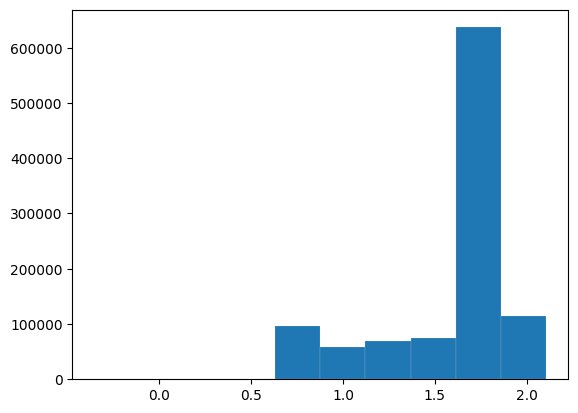

In [23]:
values, bins, _ = plt.hist(np.log(truth[:,:,1].flatten()+6), density=False, edgecolor='white', linewidth=.1)
# min(truth[:,:,0].flatten() + 6)

In [ ]:
#RMSE

truth[mask] = 99
truth[corner_mask] = 99
img[mask] = 99
img[corner_mask] = 99

truth= truth[300:700,300:700]
img= img[300:700,300:700]


diff =  np.sqrt(np.mean((truth - img)**2))
diff

In [103]:
truth.mean(), img.mean(), np.percentile(truth, 50), np.percentile(img, 50)

(0.02871476, 0.053358722, 0.007843255996704102, 0.017246535047888756)

Text(0, 0.5, 'Pixel Count')

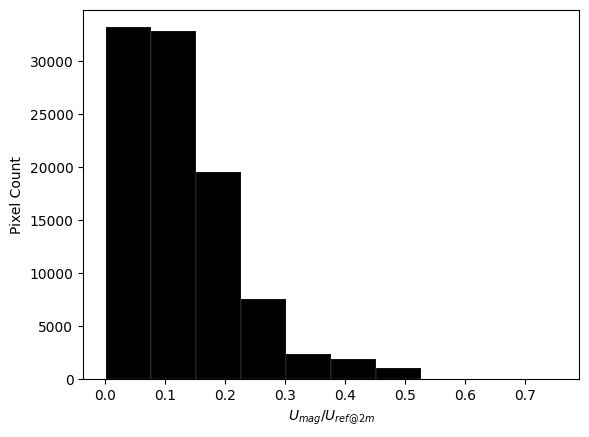

In [152]:
plt.rcParams["figure.figsize"] = [6.4, 4.8]

values, bins, _ = plt.hist(mag/UREF, density=False, color="black", edgecolor='white', linewidth=.1)
plt.xlabel("$U_{mag}$/$U_{ref@2m}$")
plt.ylabel("Pixel Count")

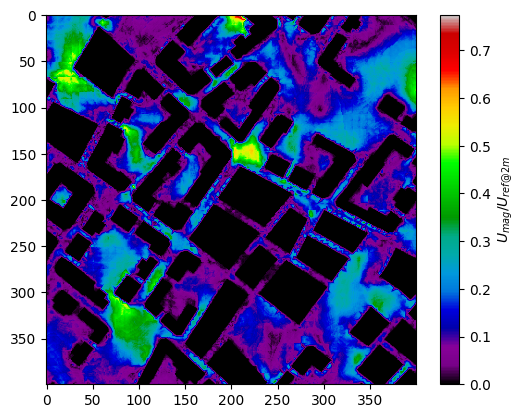

In [20]:
plt.imshow(mag/2.5, cmap='nipy_spectral')
plt.colorbar(label="$U_{mag}$/$U_{ref@2m}$")

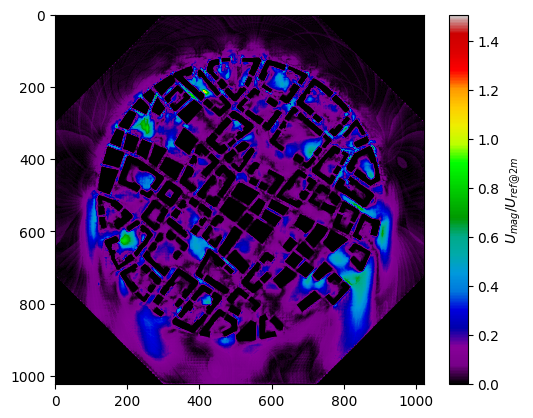

In [33]:
plt.imshow(mag/2.5, cmap='nipy_spectral')
plt.colorbar(label="$U_{mag}$/$U_{ref@2m}$")

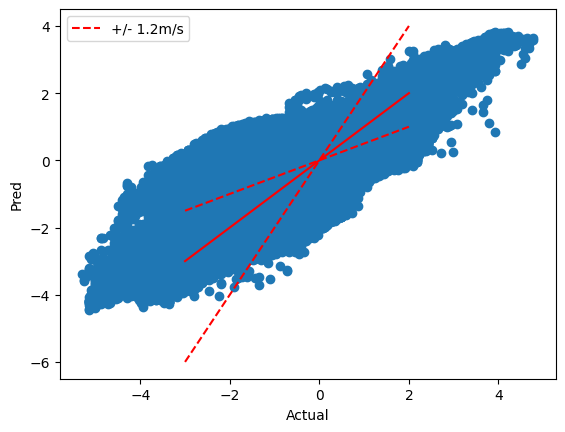

In [52]:
# # truth[mask] = 999
# # img[mask] = 999
# tux = truth.flatten()
# pux = img.flatten()
# tux = tux[tux < 999]
# pux = pux[pux < 999]


# plt.scatter(tux, pux)
# plt.plot([-3,2], [-3,2], color="red")
# plt.plot([-3,2], [-1.5,3.5], color="red", linestyle="--", label="+/- 1.5m/s")
# plt.plot([-3,2], [-4.5,0.5], color="red", linestyle="--")
# plt.ylabel("Pred")
# plt.xlabel("Actual")
# plt.legend()

plt.scatter(truth, img)
plt.plot([-3,2], [-3,2], color="red")
plt.plot([-3,2], [-6,4], color="red", linestyle="--", label="+/- 1.2m/s")
plt.plot([-3,2], [-1.5,1], color="red", linestyle="--")
plt.ylabel("Pred")
plt.xlabel("Actual")
plt.legend()

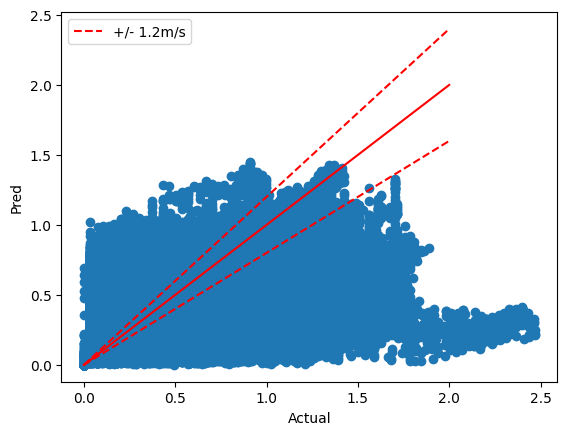

In [49]:
tmag = np.sqrt(truth[:,:,0]*truth[:,:,0] + truth[:,:,1]*truth[:,:,1] + truth[:,:,2]*truth[:,:,2])
imag = np.sqrt(img[:,:,0]*img[:,:,0] + img[:,:,1]*img[:,:,1] + img[:,:,2]*img[:,:,2])

plt.scatter(tmag[300:700, 300:700].flatten(), imag[300:700, 300:700].flatten())
# plt.scatter(truth[300:700, 300:700].flatten(), img[300:700, 300:700].flatten())
plt.plot([0,2], [0,2], color="red")
plt.plot([0,2], [0,2.4], color="red", linestyle="--", label="+/- 1.2m/s")
plt.plot([0,2], [0,1.6], color="red", linestyle="--")
plt.ylabel("Pred")
plt.xlabel("Actual")
plt.legend()

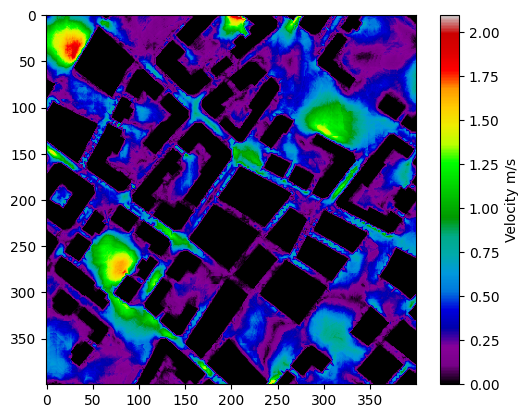

In [35]:
ux = (diff[:,:,0] * 6)-3
ux[mask] = [0]
mag = mag.clip(0,2.5)
plt.imshow(mag[300:700, 300:700], cmap='nipy_spectral')
plt.colorbar(label="Velocity m/s")
# plt.savefig("Mag Velocity error.png")

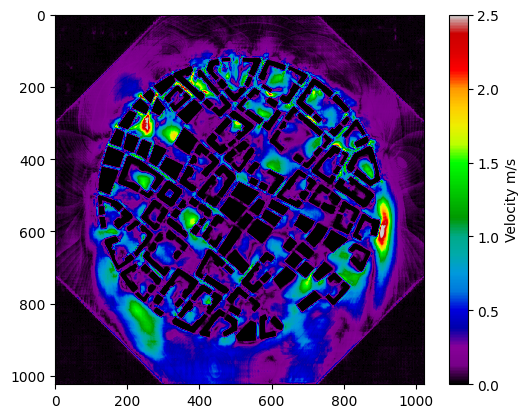

In [36]:
ux = (diff[:,:,0] * 6)-3
plt.imshow(mag, cmap='nipy_spectral')
plt.colorbar(label="Velocity m/s")
# plt.savefig("Mag Velocity error.png")

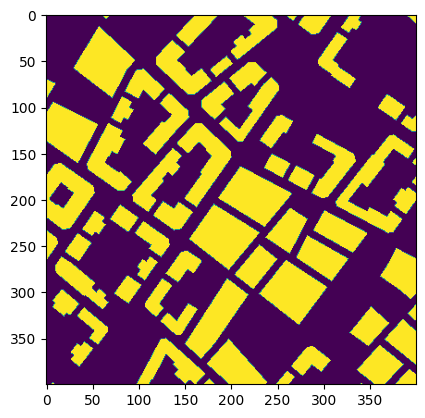

In [31]:
mag[mask] = [999]
mag = mag[300:700, 300:700]
plt.imshow(mag)

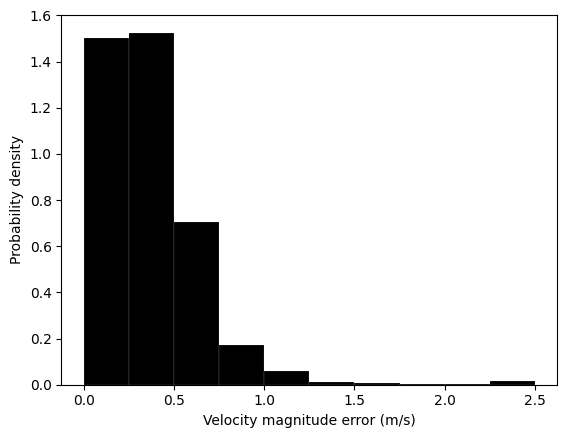

In [32]:
values, bins, _ = plt.hist(mag[mag<999], density=True, color="black", edgecolor='white', linewidth=.1)
plt.xlabel("Velocity magnitude error (m/s)")
plt.ylabel("Probability density")
plt.savefig("Velocity_mag_error_pdf.png")

bin_start = bins[:-1]
bin_end = bins[1:]
bin_widths = bins[1:] - bins[:-1]

# with open('your_file.csv', 'w') as f:
#     for line in list(zip(bin_start, bin_end, bin_widths, values)):

#         f.write(f"{line[0]},{line[1]},{line[2]},{line[3]}\n")

In [17]:
np.diff(bins) * values

array([9.22834829e-01, 7.13886887e-02, 1.05580541e-03, 4.66990853e-04,
       3.04559252e-04, 3.95927028e-04, 4.06079003e-04, 4.06079003e-04,
       7.91854055e-04, 1.94917921e-03])

In [26]:
bins

array([2.64024037e-18, 9.01377857e-01, 1.80275571e+00, 2.70413351e+00,
       3.60551143e+00, 4.50688934e+00, 5.40826702e+00, 6.30964518e+00,
       7.21102285e+00, 8.11240101e+00, 9.01377869e+00])

In [3]:
experiments = [
# "local_with_addition_pos_embd_hpo", # Addition embedding
# "42140-22072023", # Concat positional embedding
# "42204-24072023", # No positional embedding
"42680-27072023", # Concat positional embedding MAE
]

def load_and_mask(file_name):
    img = np.load(Path()/f"spacio_training_2/validation_images/{file_name}.npy")
    geo = np.load(Path()/"spacio_training_2/processed/93_0_geom.npy")
    mask = np.all(geo >= [0.003921569,0.003921569,0.003921569], axis=-1)
    truth = np.load(Path()/"spacio_training_2/processed/93_U_0_2.npy")
    truth = truth.clip(0,1)
    truth[mask] = [0,0,0]
    img[mask] = [0,0,0]

    return img, truth

def compute_magnitude(img, truth,):
    # TODO: Add component min/max as function argument
    diff = abs(truth - img)
    ux = (diff[:,:,0])*6
    uy = (diff[:,:,1])*4
    uz = (diff[:,:,2])*2
    mag = np.sqrt(ux**2 + uy**2 + uz**2)
    return mag

def generate_mag_error_plots(mag, experiment):
    plt.imshow(mag, cmap='gnuplot')
    plt.colorbar(label="Velocity m/s")
    plt.savefig(f"Mag Velocity error crop - {experiment}.png")
    plt.clf()

    plt.imshow(mag[300:700,300:700], cmap='gnuplot')
    plt.colorbar(label="Velocity m/s")
    plt.savefig(f"Mag Velocity error - {experiment}.png")
    plt.clf()

def plot_error_histogram(mag, experiment):
    # Mask buildings, do not count in the histogram
    mag[mask] = [999]

    # Plot histogram
    values, bins, _ = plt.hist(mag[mag<99], density=True, color="black", edgecolor='white', linewidth=.1)
    plt.xlabel("Velocity magnitude error (m/s)")
    plt.ylabel("Probability density")
    plt.savefig(f"Velocity mag error pdf - {experiment}.png")
    plt.clf()
    # Save data
    bin_start = bins[:-1]
    bin_end = bins[1:]
    bin_widths = bins[1:] - bins[:-1]
    with open(f'Histogram data - {experiment}.csv', 'w') as f:
        for line in list(zip(bin_start, bin_end, bin_widths, values)):
            f.write(f"{line[0]},{line[1]},{line[2]},{line[3]}\n")


    mag = mag[300:700, 300:700]
    values, bins, _ = plt.hist(mag[mag<99], density=True, color="black", edgecolor='white', linewidth=.1)
    plt.xlabel("Velocity magnitude error (m/s)")
    plt.ylabel("Probability density")
    plt.savefig(f"Velocity mag error pdf crop - {experiment}.png")
    plt.clf()
    # Save data
    bin_start = bins[:-1]
    bin_end = bins[1:]
    bin_widths = bins[1:] - bins[:-1]
    with open(f'Histogram data crop- {experiment}.csv', 'w') as f:
        for line in list(zip(bin_start, bin_end, bin_widths, values)):
            f.write(f"{line[0]},{line[1]},{line[2]},{line[3]}\n")


In [48]:
for experiment in experiments:
    img, truth = load_and_mask(experiment)
    mag = compute_magnitude(img, truth)
    generate_mag_error_plots(mag, experiment)
    plot_error_histogram(mag, experiment)
    mag[mask] = 999
    mag = mag.reshape((1024*1024,1))
    with open(f'Mag error data - {experiment}.csv', 'w') as f:
        for line in mag:
            f.write(f"{line[0]}\n")


<Figure size 640x480 with 0 Axes>

In [7]:
experiments = [
# "42262-24072023", # Standard mixer    
# "42204-24072023", # No positional embedding
# "local_with_addition_pos_embd_hpo", # Addition embedding
# "42140-22072023", # Concat positional embedding
# "42680-27072023", # Concat positional embedding with MAE
# "45154-05082023", # Concat positional embedding with MAE with additional features
# "45208-06082023", # Concat positional embedding with MSE with additional features
# "46070-10082023", # Concat positional embedding with MSE with additional features
# "46144-10082023", # Concat positional embedding with MSE with additional features
"49088-04092023", # Concat positional embedding with MSE with additional features
"49197-05092023", # Concat positional embedding with MSE with additional features

]

res = []
for experiment in experiments:
    img, truth = load_and_mask(experiment)
    mag = compute_magnitude(img, truth)
    # mag[mask] = 999
    mag = mag[300:700,300:700]
    res.append(mag[mag<999])

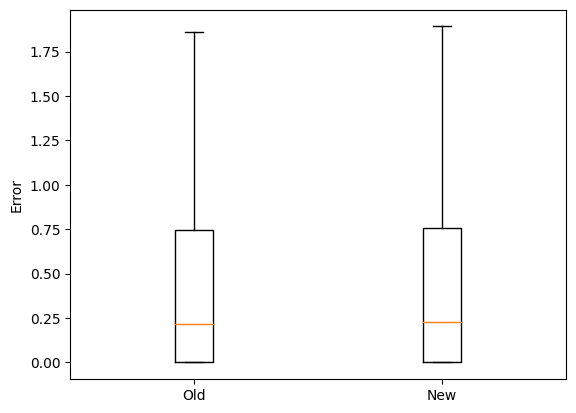

In [8]:

labels = ["Old", "New"]
plt.boxplot(res, showfliers=False, labels=labels)
plt.ylabel("Error")
plt.savefig("Error boxplot additional features MAE crop")